<a href="https://colab.research.google.com/github/cal546/DSPS_CAdkins/blob/main/hw8/higgsbosonSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- Download the Higgs boson data from Kaggle (programmatically within the notebook)
see how I did it in the Titanic Trees notebook https://github.com/fedhere/DSPS/blob/master/lab9/titanictree.ipynb

find the correct API link here https://www.kaggle.com/c/higgs-boson/data



- Read in the trainind data. Split the provided training data into a training and a test set. 
The last 2 columns are what you want to predict: "weight" and "label".
Remove them from the input data and create a separate variable label and a separate variable weight, which will be your target variables for, respectively, classification and regression.



In [24]:
import pandas as pd
import json
import os
import pylab as pl
%pylab inline
!pip install kaggle;


Populating the interactive namespace from numpy and matplotlib


In [19]:
cd /content/drive/MyDrive/.kaggle/

/content/drive/MyDrive/.kaggle


In [22]:
envs = json.load(open('kaggle.json','r'))
os.environ['KAGGLE_USERNAME'] = envs['username']
os.environ['KAGGLE_KEY'] = envs['key']

In [26]:
!kaggle competitions download -c higgs-boson

403 - Forbidden


In [28]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [30]:
!mkdir Higgs

In [31]:
cd /content/drive/MyDrive/Higgs/

/content/drive/MyDrive/Higgs


In [37]:
!kaggle competitions download -c higgs-boson

  0% 0.00/3.15k [00:00<?, ?B/s]
100% 3.15k/3.15k [00:00<00:00, 475kB/s]
  0% 0.00/2.58M [00:00<?, ?B/s]
100% 2.58M/2.58M [00:00<00:00, 42.5MB/s]
 83% 14.0M/16.9M [00:00<00:00, 58.2MB/s]
100% 16.9M/16.9M [00:00<00:00, 67.0MB/s]
 86% 30.0M/34.8M [00:00<00:00, 52.4MB/s]
100% 34.8M/34.8M [00:00<00:00, 87.8MB/s]


In [38]:
ls

HiggsBosonCompetition_AMSMetric_rev1.py  test.zip
random_submission.zip                    training.zip


In [39]:
higgsdata = pd.read_csv('training.zip')

In [40]:
higgsdata.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.0,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.0,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [41]:
higgsdata.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,158.432217,1.437609,-0.128305,-708.985189,38.707419,-0.010973,-0.008171,46.660207,-0.019507,0.043543,41.717235,-0.010119,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,115.706115,0.844743,1.193585,453.596721,22.412081,1.214079,1.816763,22.064922,1.264982,1.816611,32.894693,1.812223,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,46.104000,0.047000,-1.414000,-999.000000,20.000000,-2.499000,-3.142000,26.000000,-2.505000,-3.142000,0.109000,-3.142000,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,77.550000,0.883000,-1.371000,-999.000000,24.591750,-0.925000,-1.575000,32.375000,-1.014000,-1.522000,21.398000,-1.575000,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,120.664500,1.280000,-0.356000,-999.000000,31.804000,-0.023000,-0.033000,40.516000,-0.045000,0.086000,34.802000,-0.024000,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,200.478250,1.777000,1.225000,0.000000,45.017000,0.898000,1.565000,53.390000,0.959000,1.618000,51.895000,1.561000,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,1852.462000,19.773000,1.414000,1.000000,764.408000,2.497000,3.142000,560.271000,2.503000,3.142000,2842.617000,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


In [45]:
labels = higgsdata.Label

In [46]:
weights = higgsdata.Weight

In [63]:
higgsdata = higgsdata.drop(['Label','Weight'],axis=1)

In [64]:
# leave
from sklearn.model_selection import train_test_split 

In [90]:
X_train, X_test,y_train,y_test = train_test_split(higgsdata,labels,test_size=0.5)

- Use a Random Forest and a Gradiend Boosted Tree Classifier model to predict the label of the particles. get the score of the model on the training and test set and comment on the result for each model.


In [91]:
#leave 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification

# Look at parameters used by our current forest
rf = RandomForestClassifier(random_state = 0,max_depth=4)
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [92]:
gbt = GradientBoostingClassifier(max_depth=4,random_state=22)

In [93]:
rf.fit(X_train,y_train)
gbt.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=4, random_state=22)

calculate the  scores for the training and test sets and evaluate  overtraining etc

In [94]:
rf.score(X_train,y_train) , rf.score(X_test,y_test)

(0.811392, 0.809704)

In [95]:
gbt.score(X_train,y_train) , gbt.score(X_test,y_test)

(0.842192, 0.834808)

- Produce a confusion matrix for each model and compare them


 



In [96]:

# I creaded this function (mostly copied from sklearn examples). 
# You can use it to create the confusion matrix
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title='',
                          cmap=pl.cm.bone):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """         
    if normalize:
          title = title + ' Normalized confusion matrix'
    else:
          title = title + ' Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # plot it
    fig, ax = plt.subplots(1, 1)
    fig.subplots_adjust()
    im = ax.imshow(cm, cmap=cmap)
    ax_divider = make_axes_locatable(ax)
    # add an axes to the right of the main axes.
    pl.xticks([0, 1], labels=["N", "P"])
    pl.ylim(-0.5,1.5)
    pl.yticks([0,1], labels=["N", "P"])    
    pl.title(title)
    cax = ax_divider.append_axes("right", size="10%", pad="2%")
    cb = colorbar(im, cax=cax)
    

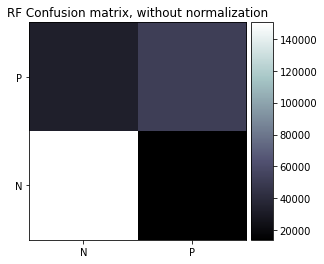

In [97]:
plot_confusion_matrix(labels,rf.predict(higgsdata),title='RF')

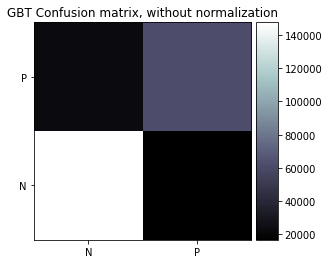

In [98]:
plot_confusion_matrix(labels,gbt.predict(higgsdata),title='GBT')


- Use a Random Forest and a Gradiend Boosted Tree Regressor model to predict the weight of the particles. Compare the model performance on training and test setsm


In [99]:
traindata_weights, testdata_weights, train_weights, test_weights = train_test_split(higgsdata,weights,test_size=0.5)

In [102]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
rfR = RandomForestRegressor(n_estimators=100, max_depth=3,
                                  random_state=0)
rfR.fit(traindata_weights,train_weights)
gbtR = GradientBoostingRegressor(n_estimators=100,max_depth=3,random_state=0)
gbtR.fit(traindata_weights,train_weights)

GradientBoostingRegressor(random_state=0)

 Calculate the L2 and L1 loss functions for the fitted regression models (see slides for the definition) and discuss the results

In [110]:
def L1(true, predicted):
  return (np.abs(true-predicted)).sum()


def L2(true, predicted):
  return np.sum(np.abs(true-predicted)**2)

print("L1 RF {:.0f}".format(L1(weights,rfR.predict(higgsdata))))
print("L2 RF {:.0f}".format(L2(weights,rfR.predict(higgsdata))))
print("L1 GBT {:.0f}".format(L1(weights,gbtR.predict(higgsdata))))
print("L2 GBT {:.0f}".format(L2(weights,gbtR.predict(higgsdata))))

L1 RF 251681
L2 RF 457513
L1 GBT 210774
L2 GBT 338978


- For the Random Forest classifier, find the 4 most important features based on the simple unoptimized model you created earlier on. Use the documentation to find out what they are. We have not talked abotu the physics of this problem at all but the Kaggle challenge description should provide enogh information for you to comment on this result is somewhat superficially.

    You can use ```rf.feature_importance_``` on the trained model to extract the relative importance of each feature (a number from 0 to 1) and then choose the features that have the 4 highest numbers (the numpy function ```argsort()``` is helpful here!)

- Explore the parameter space with the sklearn module ```sklearn.model_selection.RandomizedSearchCV``` *fitting only those 4 features*

    Follow this example to set up the parameter search. Set the estimators to 10 and 100, (the number of trees) and the max depth to 3, and 10, and None (let it be unconstrained). Set bootstrap to both True and False. Set the number of features to consider at every split to both "autp" and "sqrt". Use ```pprint``` like I did earlier in this notebook to print the parameters set

**this takes some computational time! so do not start this at the last minute!!**

 



In [151]:
l = np.argsort(rf.feature_importances_)
k = rf.feature_names_in_
for i in range(len(l)):
  print(i,k[i],l[i])

0 EventId 0
1 DER_mass_MMC 21
2 DER_mass_transverse_met_lep 16
3 DER_mass_vis 19
4 DER_pt_h 15
5 DER_deltaeta_jet_jet 18
6 DER_mass_jet_jet 28
7 DER_prodeta_jet_jet 29
8 DER_deltar_tau_lep 27
9 DER_pt_tot 26
10 DER_sum_pt 25
11 DER_pt_ratio_lep_tau 9
12 DER_met_phi_centrality 7
13 DER_lep_eta_centrality 23
14 PRI_tau_pt 22
15 PRI_tau_eta 24
16 PRI_tau_phi 4
17 PRI_lep_pt 30
18 PRI_lep_eta 17
19 PRI_lep_phi 20
20 PRI_met 10
21 PRI_met_phi 8
22 PRI_met_sumet 6
23 PRI_jet_num 13
24 PRI_jet_leading_pt 5
25 PRI_jet_leading_eta 12
26 PRI_jet_leading_phi 11
27 PRI_jet_subleading_pt 14
28 PRI_jet_subleading_eta 3
29 PRI_jet_subleading_phi 2
30 PRI_jet_all_pt 1


In [120]:
from sklearn.model_selection import RandomizedSearchCV

In [152]:
best_features_index = [6,7,8,17]

In [153]:
higgsdata.iloc[:,best_features_index]

,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,PRI_lep_pt
0,124.711,2.666,3.064,51.626
1,-999.000,-999.000,3.473,36.918
2,-999.000,-999.000,3.148,121.409
3,-999.000,-999.000,3.310,53.321
4,-999.000,-999.000,3.891,29.774
...,...,...,...,...
249995,-999.000,-999.000,1.392,31.137
249996,-999.000,-999.000,2.585,27.202
249997,-999.000,-999.000,2.390,42.834
249998,-999.000,-999.000,3.365,27.915


In [154]:
random_grid = {'max_depth': [3, 10, None],
 'max_features': ['auto', 'sqrt'],
 'n_estimators': [10, 100, 1000]}


In [156]:
random_search = RandomizedSearchCV(estimator = rf, param_distributions=random_grid,
                                   n_iter=1, cv=3)#, iid=False)

 mine and your best features do not necessarily have to be the same because our models may be different (different parameters, different random seed etc)

In [157]:
higgsdata.iloc[:, best_features_index]

,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,PRI_lep_pt
0,124.711,2.666,3.064,51.626
1,-999.000,-999.000,3.473,36.918
2,-999.000,-999.000,3.148,121.409
3,-999.000,-999.000,3.310,53.321
4,-999.000,-999.000,3.891,29.774
...,...,...,...,...
249995,-999.000,-999.000,1.392,31.137
249996,-999.000,-999.000,2.585,27.202
249997,-999.000,-999.000,2.390,42.834
249998,-999.000,-999.000,3.365,27.915


Note that this may take a long time! It took 1 hour for me to run this. Dont start at the last minute!!

In [159]:
random_search.fit(higgsdata,labels)
                  

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(max_depth=4,
                                                    random_state=0),
                   n_iter=1,
                   param_distributions={'max_depth': [3, 10, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [10, 100, 1000]})

In [160]:
print("Tuned RF  Parameters: {}".format(...))
print("Best score is {}".format(...))


Tuned RF  Parameters: Ellipsis
Best score is Ellipsis


In [161]:
df = pd.DataFrame(random_search.cv_results_)


In [162]:
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,22.115392,0.116079,0.793508,0.015417,100,auto,3,"{'n_estimators': 100, 'max_features': 'auto', ...",0.792738,0.793323,0.794571,0.793544,0.000765,1


# Extra Credit: Plot a simple 3-point ROC curve for the model with the best parameters found in the previous step. Describe it. 

In [172]:
rf.fit(X_train, y_train.values.flatten()=="s")#, max_depth=3)

RandomForestClassifier(max_depth=4, random_state=0)

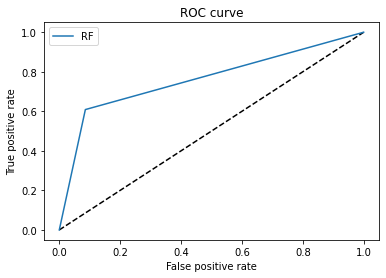

In [170]:
# The random forest model by itself
from sklearn.metrics import roc_curve
y_pred_grd_rfcat = rf.predict_proba(X_test)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(y_test.values.flatten()=="s", rf.predict(X_test))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
